In [21]:
Train_Path= 'C:/WinPython_64bit/notebooks/Latihan Deep Learning Klasifikasi Hero Dota/p5_training_data.csv'
Val_Path = 'C:/WinPython_64bit/notebooks/Latihan Deep Learning Klasifikasi Hero Dota/p5_val_data.csv'

In [22]:
import pandas as pd
import torch 
import torch.nn as nn
import numpy as np

In [23]:
Train = pd.read_csv(Train_Path)
Val = pd.read_csv(Val_Path)

In [24]:
Train.head()

,name,type,baseStr,strGrowth,maxStr,baseAgi,agiGrowth,maxAgi,baseInt,intGrowth,...,moveSpeed,baseArmor,minDmg,maxDmg,range,baseAttackTime,attackPoint,attackBackswing,turnRate,regeneration
0,Abaddon,0,23,2.6,85.4,17,1.5,53.0,21,2.0,...,310,1.43,55,65,150,1.70,0.56,0.41,0.6,1.50
1,Ancient Apparition,2,18,1.7,58.8,20,2.2,72.8,25,2.6,...,295,1.86,44,54,675,1.70,0.45,0.30,0.6,1.50
2,Anti-Mage,1,22,1.5,58.0,22,2.8,89.2,15,1.8,...,310,2.14,49,53,150,1.45,0.30,0.60,0.5,1.50
3,Axe,0,25,2.8,92.2,20,2.2,72.8,18,1.6,...,290,1.86,49,53,150,1.70,0.50,0.50,0.6,4.25
4,Bane,2,23,2.4,80.6,23,2.4,80.6,23,2.4,...,310,4.29,60,66,400,1.70,0.30,0.70,0.6,1.50


In [25]:
Val.head()

,name,type,baseStr,strGrowth,maxStr,baseAgi,agiGrowth,maxAgi,baseInt,intGrowth,...,moveSpeed,baseArmor,minDmg,maxDmg,range,baseAttackTime,attackPoint,attackBackswing,turnRate,regeneration
0,ArcWarden,1,24,3.0,96.0,15,1.8,58.2,24,2.6,...,280,0.14,44,54,625,1.7,0.30,0.700,0.6,1.5
1,Jakiro,2,25,2.6,87.4,10,1.2,38.8,28,2.8,...,290,2.43,53,61,400,1.7,0.40,0.500,0.5,1.5
2,WinterWyvern,2,24,2.4,81.6,16,1.9,61.6,25,3.1,...,285,1.29,38,45,425,1.7,0.25,0.800,0.5,1.5
3,Bloodseeker,1,23,2.7,87.8,24,3.0,96.0,18,1.7,...,285,3.43,57,63,150,1.7,0.43,0.740,0.5,1.5
4,Phoenix,0,19,3.2,95.8,12,1.3,43.2,18,1.8,...,285,-0.29,45,55,500,1.7,0.35,0.633,1.0,1.5


In [26]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 24 columns):
name               99 non-null object
type               99 non-null int64
baseStr            99 non-null int64
strGrowth          99 non-null float64
maxStr             99 non-null float64
baseAgi            99 non-null int64
agiGrowth          99 non-null float64
maxAgi             99 non-null float64
baseInt            99 non-null int64
intGrowth          99 non-null float64
maxInt             99 non-null float64
totalBaseAttr      99 non-null int64
totalAttrGrowth    99 non-null float64
totalMaxAttr       99 non-null float64
moveSpeed          99 non-null int64
baseArmor          99 non-null float64
minDmg             99 non-null int64
maxDmg             99 non-null int64
range              99 non-null int64
baseAttackTime     99 non-null float64
attackPoint        99 non-null float64
attackBackswing    99 non-null float64
turnRate           99 non-null float64
regeneration       

In [27]:
#Drop Unnecessary columns
Train.drop(Train.columns[[5 , 12, 14, 21, 22, 23]],axis=1, inplace= True)
Val.drop(Val.columns[[5 , 12, 14, 21, 22, 23]],axis=1, inplace= True)

In [28]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 18 columns):
name              99 non-null object
type              99 non-null int64
baseStr           99 non-null int64
strGrowth         99 non-null float64
maxStr            99 non-null float64
agiGrowth         99 non-null float64
maxAgi            99 non-null float64
baseInt           99 non-null int64
intGrowth         99 non-null float64
maxInt            99 non-null float64
totalBaseAttr     99 non-null int64
totalMaxAttr      99 non-null float64
baseArmor         99 non-null float64
minDmg            99 non-null int64
maxDmg            99 non-null int64
range             99 non-null int64
baseAttackTime    99 non-null float64
attackPoint       99 non-null float64
dtypes: float64(10), int64(7), object(1)
memory usage: 14.0+ KB


In [29]:
#Use Columns 2 to last as Input and get values
x_train = Train.iloc[:,2:].values
x_val   = Val.iloc[:,2:].values

#Use Coloumns 1 as Target and get values
y_train = Train.iloc[:,1].values
y_val   = Val.iloc[:,1].values

In [30]:
y_train

array([0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2], dtype=int64)

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16, 10)
        self.fc2 = nn.Linear(10,3)
        
    def forward(self, x):
        x = self.fc1(x)
        #x = F.dropout(x, p=0.1)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.softmax(x)        
        return x
    
net = Net()

In [34]:
batch_size = 1
num_epochs = 5000
learning_rate = 0.001
batch_no = len(x_train) // batch_size

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [36]:
Accuration_train=[]
Accuration_val=[]
log_loss=[]

In [37]:
from sklearn.utils import shuffle
from torch.autograd import Variable

for epoch in range(num_epochs):
    x_train, y_train = shuffle(x_train, y_train)
    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_var = Variable(torch.FloatTensor(x_train[start:end]))
        y_var = Variable(torch.LongTensor(y_train[start:end]))
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        ypred_var = net(x_var)
        loss =criterion(ypred_var, y_var)
        loss.backward()
        optimizer.step()   
    log_loss.append(loss)
    
    # Evaluate the model On Validation Data
    test_var = Variable(torch.FloatTensor(x_train), requires_grad=True)
    with torch.no_grad():
        result = net(test_var)
    values, labels = torch.max(result, 1)
    num_right = np.sum(labels.data.numpy() == y_train)
    Accuration_train.append(num_right / len(y_train))
    
    # Evaluate the model On Train Data
    test_var = Variable(torch.FloatTensor(x_val), requires_grad=True)
    with torch.no_grad():
        result = net(test_var)
    values, labels = torch.max(result, 1)
    num_right = np.sum(labels.data.numpy() == y_val)
    Accuration_val.append(num_right / len(y_val))
    # Print Epoch dan accuration 
    print('Epoch {0} |Accuracy_Train {1:0.2f} |Accuracy_Val {2:0.2f} |Loss {3}  '.format(epoch+1,Accuration_train[epoch],
                                                                          Accuration_val[epoch],log_loss[epoch]))

c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1 |Accuracy_Train 0.28 |Accuracy_Val 0.38 |Loss 1.1559951305389404  
Epoch 2 |Accuracy_Train 0.28 |Accuracy_Val 0.38 |Loss 1.3514201641082764  
Epoch 3 |Accuracy_Train 0.28 |Accuracy_Val 0.38 |Loss 1.3488008975982666  
Epoch 4 |Accuracy_Train 0.28 |Accuracy_Val 0.38 |Loss 1.1344022750854492  
Epoch 5 |Accuracy_Train 0.28 |Accuracy_Val 0.38 |Loss 1.3597216606140137  
Epoch 6 |Accuracy_Train 0.28 |Accuracy_Val 0.38 |Loss 1.0402621030807495  
Epoch 7 |Accuracy_Train 0.28 |Accuracy_Val 0.38 |Loss 1.3393441438674927  
Epoch 8 |Accuracy_Train 0.28 |Accuracy_Val 0.38 |Loss 1.337098479270935  
Epoch 9 |Accuracy_Train 0.28 |Accuracy_Val 0.38 |Loss 0.8580752015113831  
Epoch 10 |Accuracy_Train 0.28 |Accuracy_Val 0.38 |Loss 1.0955511331558228  
Epoch 11 |Accuracy_Train 0.30 |Accuracy_Val 0.44 |Loss 1.330676794052124  
Epoch 12 |Accuracy_Train 0.40 |Accuracy_Val 0.38 |Loss 1.0736700296401978  
Epoch 13 |Accuracy_Train 0.40 |Accuracy_Val 0.44 |Loss 0.9934977889060974  
Epoch 14 |Accuracy_Trai

Epoch 111 |Accuracy_Train 0.81 |Accuracy_Val 0.69 |Loss 0.9347583055496216  
Epoch 112 |Accuracy_Train 0.79 |Accuracy_Val 0.69 |Loss 1.2432440519332886  
Epoch 113 |Accuracy_Train 0.81 |Accuracy_Val 0.69 |Loss 0.9265881180763245  
Epoch 114 |Accuracy_Train 0.80 |Accuracy_Val 0.75 |Loss 0.922347366809845  
Epoch 115 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.9172189831733704  
Epoch 116 |Accuracy_Train 0.79 |Accuracy_Val 0.75 |Loss 0.7642338275909424  
Epoch 117 |Accuracy_Train 0.78 |Accuracy_Val 0.69 |Loss 0.7609654664993286  
Epoch 118 |Accuracy_Train 0.79 |Accuracy_Val 0.75 |Loss 0.9051720499992371  
Epoch 119 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 1.3442699909210205  
Epoch 120 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.7689670324325562  
Epoch 121 |Accuracy_Train 0.80 |Accuracy_Val 0.75 |Loss 1.2798734903335571  
Epoch 122 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.8926538825035095  
Epoch 123 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.8902775645256042  


Epoch 218 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 1.4306831359863281  
Epoch 219 |Accuracy_Train 0.80 |Accuracy_Val 0.75 |Loss 0.749024510383606  
Epoch 220 |Accuracy_Train 0.80 |Accuracy_Val 0.75 |Loss 0.8082011938095093  
Epoch 221 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.7278294563293457  
Epoch 222 |Accuracy_Train 0.79 |Accuracy_Val 0.75 |Loss 0.6696818470954895  
Epoch 223 |Accuracy_Train 0.78 |Accuracy_Val 0.69 |Loss 0.7468902468681335  
Epoch 224 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.7448017597198486  
Epoch 225 |Accuracy_Train 0.80 |Accuracy_Val 0.75 |Loss 1.110307216644287  
Epoch 226 |Accuracy_Train 0.80 |Accuracy_Val 0.69 |Loss 1.1107195615768433  
Epoch 227 |Accuracy_Train 0.76 |Accuracy_Val 0.75 |Loss 0.7502841949462891  
Epoch 228 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.7417245507240295  
Epoch 229 |Accuracy_Train 0.76 |Accuracy_Val 0.69 |Loss 0.665554940700531  
Epoch 230 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.7398624420166016  
Ep

Epoch 326 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.6851548552513123  
Epoch 327 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.6272710561752319  
Epoch 328 |Accuracy_Train 0.81 |Accuracy_Val 0.69 |Loss 0.6848486065864563  
Epoch 329 |Accuracy_Train 0.81 |Accuracy_Val 0.69 |Loss 1.0451982021331787  
Epoch 330 |Accuracy_Train 0.80 |Accuracy_Val 0.69 |Loss 0.6995368599891663  
Epoch 331 |Accuracy_Train 0.81 |Accuracy_Val 0.69 |Loss 0.6415207982063293  
Epoch 332 |Accuracy_Train 0.80 |Accuracy_Val 0.75 |Loss 0.6832672953605652  
Epoch 333 |Accuracy_Train 0.78 |Accuracy_Val 0.69 |Loss 0.6278466582298279  
Epoch 334 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 1.041749119758606  
Epoch 335 |Accuracy_Train 0.78 |Accuracy_Val 0.69 |Loss 0.7452918291091919  
Epoch 336 |Accuracy_Train 0.81 |Accuracy_Val 0.69 |Loss 1.450158953666687  
Epoch 337 |Accuracy_Train 0.78 |Accuracy_Val 0.69 |Loss 0.6813862323760986  
Epoch 338 |Accuracy_Train 0.80 |Accuracy_Val 0.69 |Loss 0.681076169013977  
Ep

Epoch 433 |Accuracy_Train 0.74 |Accuracy_Val 0.62 |Loss 0.987945556640625  
Epoch 434 |Accuracy_Train 0.79 |Accuracy_Val 0.75 |Loss 0.6078668832778931  
Epoch 435 |Accuracy_Train 0.77 |Accuracy_Val 0.62 |Loss 0.6847391724586487  
Epoch 436 |Accuracy_Train 0.75 |Accuracy_Val 0.69 |Loss 1.382647156715393  
Epoch 437 |Accuracy_Train 0.81 |Accuracy_Val 0.69 |Loss 1.3667347431182861  
Epoch 438 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.6558386087417603  
Epoch 439 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.6562535762786865  
Epoch 440 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.6318155527114868  
Epoch 441 |Accuracy_Train 0.81 |Accuracy_Val 0.69 |Loss 0.6565133929252625  
Epoch 442 |Accuracy_Train 0.80 |Accuracy_Val 0.75 |Loss 0.6045709848403931  
Epoch 443 |Accuracy_Train 0.81 |Accuracy_Val 0.69 |Loss 0.6023721098899841  
Epoch 444 |Accuracy_Train 0.81 |Accuracy_Val 0.69 |Loss 0.6023911833763123  
Epoch 445 |Accuracy_Train 0.79 |Accuracy_Val 0.69 |Loss 0.6022986173629761  
E

Epoch 540 |Accuracy_Train 0.87 |Accuracy_Val 0.69 |Loss 0.6398059725761414  
Epoch 541 |Accuracy_Train 0.85 |Accuracy_Val 0.69 |Loss 0.7457262873649597  
Epoch 542 |Accuracy_Train 0.85 |Accuracy_Val 0.69 |Loss 0.5907623767852783  
Epoch 543 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.510162591934204  
Epoch 544 |Accuracy_Train 0.83 |Accuracy_Val 0.75 |Loss 0.6389495730400085  
Epoch 545 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5902565717697144  
Epoch 546 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5902578830718994  
Epoch 547 |Accuracy_Train 0.87 |Accuracy_Val 0.69 |Loss 0.6389569640159607  
Epoch 548 |Accuracy_Train 0.70 |Accuracy_Val 0.50 |Loss 1.4761066436767578  
Epoch 549 |Accuracy_Train 0.80 |Accuracy_Val 0.62 |Loss 0.6392868161201477  
Epoch 550 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.9977289438247681  
Epoch 551 |Accuracy_Train 0.86 |Accuracy_Val 0.69 |Loss 0.9097682237625122  
Epoch 552 |Accuracy_Train 0.68 |Accuracy_Val 0.56 |Loss 1.0180836915969849  


Epoch 648 |Accuracy_Train 0.87 |Accuracy_Val 0.69 |Loss 1.367580533027649  
Epoch 649 |Accuracy_Train 0.88 |Accuracy_Val 0.81 |Loss 1.295733094215393  
Epoch 650 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.5949071645736694  
Epoch 651 |Accuracy_Train 0.82 |Accuracy_Val 0.62 |Loss 0.6528275012969971  
Epoch 652 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.5797569751739502  
Epoch 653 |Accuracy_Train 0.73 |Accuracy_Val 0.50 |Loss 1.0512737035751343  
Epoch 654 |Accuracy_Train 0.81 |Accuracy_Val 0.50 |Loss 0.8722659945487976  
Epoch 655 |Accuracy_Train 0.88 |Accuracy_Val 0.62 |Loss 0.5823649168014526  
Epoch 656 |Accuracy_Train 0.69 |Accuracy_Val 0.50 |Loss 0.5850718021392822  
Epoch 657 |Accuracy_Train 0.88 |Accuracy_Val 0.75 |Loss 0.8936710357666016  
Epoch 658 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 1.2913334369659424  
Epoch 659 |Accuracy_Train 0.71 |Accuracy_Val 0.56 |Loss 0.8934690356254578  
Epoch 660 |Accuracy_Train 0.86 |Accuracy_Val 0.75 |Loss 0.5790418386459351  
E

Epoch 756 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 1.5006035566329956  
Epoch 757 |Accuracy_Train 0.85 |Accuracy_Val 0.75 |Loss 0.5828060507774353  
Epoch 758 |Accuracy_Train 0.90 |Accuracy_Val 0.69 |Loss 1.106091856956482  
Epoch 759 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5754057765007019  
Epoch 760 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 0.6190387606620789  
Epoch 761 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.619036853313446  
Epoch 762 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5728013515472412  
Epoch 763 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 1.5007824897766113  
Epoch 764 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6195656657218933  
Epoch 765 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5748794674873352  
Epoch 766 |Accuracy_Train 0.88 |Accuracy_Val 0.81 |Loss 0.822016716003418  
Epoch 767 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.620276689529419  
Epoch 768 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5748372077941895  
Epo

Epoch 863 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.6108582615852356  
Epoch 864 |Accuracy_Train 0.87 |Accuracy_Val 0.69 |Loss 0.5701169371604919  
Epoch 865 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.5699830651283264  
Epoch 866 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5700968503952026  
Epoch 867 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.7999531626701355  
Epoch 868 |Accuracy_Train 0.87 |Accuracy_Val 0.62 |Loss 0.6120901107788086  
Epoch 869 |Accuracy_Train 0.88 |Accuracy_Val 0.69 |Loss 0.8769578337669373  
Epoch 870 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5699157118797302  
Epoch 871 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.5698788166046143  
Epoch 872 |Accuracy_Train 0.85 |Accuracy_Val 0.75 |Loss 0.5693933367729187  
Epoch 873 |Accuracy_Train 0.84 |Accuracy_Val 0.62 |Loss 0.5692391991615295  
Epoch 874 |Accuracy_Train 0.87 |Accuracy_Val 0.69 |Loss 0.6129709482192993  
Epoch 875 |Accuracy_Train 0.84 |Accuracy_Val 0.62 |Loss 0.7895780801773071  

Epoch 973 |Accuracy_Train 0.88 |Accuracy_Val 0.69 |Loss 0.5678830146789551  
Epoch 974 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5658344030380249  
Epoch 975 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.5330294370651245  
Epoch 976 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6076173782348633  
Epoch 977 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.5676614046096802  
Epoch 978 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.6078125238418579  
Epoch 979 |Accuracy_Train 0.87 |Accuracy_Val 0.69 |Loss 0.7062936425209045  
Epoch 980 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5656810402870178  
Epoch 981 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 1.5332918167114258  
Epoch 982 |Accuracy_Train 0.82 |Accuracy_Val 0.50 |Loss 0.7636189460754395  
Epoch 983 |Accuracy_Train 0.88 |Accuracy_Val 0.62 |Loss 0.6067743897438049  
Epoch 984 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5856471061706543  
Epoch 985 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5657068490982056  

Epoch 1082 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5657686591148376  
Epoch 1083 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.751312792301178  
Epoch 1084 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.565748929977417  
Epoch 1085 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 0.6010805368423462  
Epoch 1086 |Accuracy_Train 0.84 |Accuracy_Val 0.56 |Loss 0.565678060054779  
Epoch 1087 |Accuracy_Train 0.66 |Accuracy_Val 0.50 |Loss 0.7505099773406982  
Epoch 1088 |Accuracy_Train 0.69 |Accuracy_Val 0.50 |Loss 0.7618638873100281  
Epoch 1089 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5653598308563232  
Epoch 1090 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.7533999085426331  
Epoch 1091 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.6746601462364197  
Epoch 1092 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5969048738479614  
Epoch 1093 |Accuracy_Train 0.84 |Accuracy_Val 0.56 |Loss 0.7647071480751038  
Epoch 1094 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.56939190

Epoch 1188 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5973087549209595  
Epoch 1189 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5618597269058228  
Epoch 1190 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5638056993484497  
Epoch 1191 |Accuracy_Train 0.88 |Accuracy_Val 0.62 |Loss 0.5637421011924744  
Epoch 1192 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5618454217910767  
Epoch 1193 |Accuracy_Train 0.83 |Accuracy_Val 0.75 |Loss 0.5975907444953918  
Epoch 1194 |Accuracy_Train 0.90 |Accuracy_Val 0.81 |Loss 0.726360559463501  
Epoch 1195 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.564146101474762  
Epoch 1196 |Accuracy_Train 0.83 |Accuracy_Val 0.62 |Loss 0.5638341307640076  
Epoch 1197 |Accuracy_Train 0.70 |Accuracy_Val 0.50 |Loss 1.5371733903884888  
Epoch 1198 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 1.5185388326644897  
Epoch 1199 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 0.5637114644050598  
Epoch 1200 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.5616751

Epoch 1296 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5619678497314453  
Epoch 1297 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5958731770515442  
Epoch 1298 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5606357455253601  
Epoch 1299 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5619399547576904  
Epoch 1300 |Accuracy_Train 0.88 |Accuracy_Val 0.62 |Loss 0.56194007396698  
Epoch 1301 |Accuracy_Train 0.88 |Accuracy_Val 0.75 |Loss 0.5619307160377502  
Epoch 1302 |Accuracy_Train 0.82 |Accuracy_Val 0.75 |Loss 0.5952660441398621  
Epoch 1303 |Accuracy_Train 0.76 |Accuracy_Val 0.50 |Loss 0.5619602799415588  
Epoch 1304 |Accuracy_Train 0.90 |Accuracy_Val 0.69 |Loss 0.5606932044029236  
Epoch 1305 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.5944470167160034  
Epoch 1306 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 0.5606839656829834  
Epoch 1307 |Accuracy_Train 0.84 |Accuracy_Val 0.62 |Loss 0.560624897480011  
Epoch 1308 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.59435957

Epoch 1402 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 1.1840311288833618  
Epoch 1403 |Accuracy_Train 0.89 |Accuracy_Val 0.81 |Loss 0.5943377017974854  
Epoch 1404 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5584522485733032  
Epoch 1405 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.5392909049987793  
Epoch 1406 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5942226648330688  
Epoch 1407 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5941854119300842  
Epoch 1408 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.5583543181419373  
Epoch 1409 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.59404456615448  
Epoch 1410 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 0.5940211415290833  
Epoch 1411 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5939272046089172  
Epoch 1412 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5938584804534912  
Epoch 1413 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5620014071464539  
Epoch 1414 |Accuracy_Train 0.90 |Accuracy_Val 0.81 |Loss 1.2780153

Epoch 1510 |Accuracy_Train 0.81 |Accuracy_Val 0.69 |Loss 0.5616083145141602  
Epoch 1511 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5572488903999329  
Epoch 1512 |Accuracy_Train 0.87 |Accuracy_Val 0.69 |Loss 0.5920669436454773  
Epoch 1513 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 1.5400193929672241  
Epoch 1514 |Accuracy_Train 0.88 |Accuracy_Val 0.75 |Loss 0.5616602897644043  
Epoch 1515 |Accuracy_Train 0.81 |Accuracy_Val 0.69 |Loss 0.5616511106491089  
Epoch 1516 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5616860389709473  
Epoch 1517 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5570915937423706  
Epoch 1518 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5920069217681885  
Epoch 1519 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5915591716766357  
Epoch 1520 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5915050506591797  
Epoch 1521 |Accuracy_Train 0.90 |Accuracy_Val 0.69 |Loss 0.5914677977561951  
Epoch 1522 |Accuracy_Train 0.84 |Accuracy_Val 0.56 |Loss 0.56136

Epoch 1619 |Accuracy_Train 0.82 |Accuracy_Val 0.56 |Loss 0.5882810950279236  
Epoch 1620 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5594514012336731  
Epoch 1621 |Accuracy_Train 0.90 |Accuracy_Val 0.69 |Loss 0.5575648546218872  
Epoch 1622 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 0.5879677534103394  
Epoch 1623 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 0.5878998637199402  
Epoch 1624 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.557616114616394  
Epoch 1625 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.557606041431427  
Epoch 1626 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.587848961353302  
Epoch 1627 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5593569278717041  
Epoch 1628 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6717663407325745  
Epoch 1629 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5878875255584717  
Epoch 1630 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 0.6714645624160767  
Epoch 1631 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.58781039

Epoch 1728 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.4879720211029053  
Epoch 1729 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.557880699634552  
Epoch 1730 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.557834267616272  
Epoch 1731 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6631202101707458  
Epoch 1732 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5854154229164124  
Epoch 1733 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5578118562698364  
Epoch 1734 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.5437006950378418  
Epoch 1735 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.5265446901321411  
Epoch 1736 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5577601194381714  
Epoch 1737 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5854610204696655  
Epoch 1738 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.6617180705070496  
Epoch 1739 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.543691873550415  
Epoch 1740 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.56229215

Epoch 1836 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 1.2302130460739136  
Epoch 1837 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.7751947641372681  
Epoch 1838 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.557144284248352  
Epoch 1839 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5833721160888672  
Epoch 1840 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5575097799301147  
Epoch 1841 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.6536061763763428  
Epoch 1842 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5571526288986206  
Epoch 1843 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5571293234825134  
Epoch 1844 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5833140015602112  
Epoch 1845 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5833103060722351  
Epoch 1846 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6000646948814392  
Epoch 1847 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.583305835723877  
Epoch 1848 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5833253

Epoch 1944 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5822466015815735  
Epoch 1945 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.556920051574707  
Epoch 1946 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.5447052717208862  
Epoch 1947 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5569046139717102  
Epoch 1948 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.5447049140930176  
Epoch 1949 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5822048783302307  
Epoch 1950 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 0.5565456748008728  
Epoch 1951 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.6439868807792664  
Epoch 1952 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.5820468068122864  
Epoch 1953 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5568262934684753  
Epoch 1954 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.644864022731781  
Epoch 1955 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.5293512344360352  
Epoch 1956 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.6366017

Epoch 2054 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.5566583275794983  
Epoch 2055 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 1.5304690599441528  
Epoch 2056 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.5562206506729126  
Epoch 2057 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5798993110656738  
Epoch 2058 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6560476422309875  
Epoch 2059 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.6070700883865356  
Epoch 2060 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5798835754394531  
Epoch 2061 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 1.545466661453247  
Epoch 2062 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.616802990436554  
Epoch 2063 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5798264145851135  
Epoch 2064 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.579839289188385  
Epoch 2065 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 0.5561849474906921  
Epoch 2066 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.63939005

Epoch 2163 |Accuracy_Train 0.88 |Accuracy_Val 0.75 |Loss 0.8545640707015991  
Epoch 2164 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 1.500061273574829  
Epoch 2165 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.6358605027198792  
Epoch 2166 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.5785342454910278  
Epoch 2167 |Accuracy_Train 0.88 |Accuracy_Val 0.75 |Loss 0.5560880899429321  
Epoch 2168 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5785484313964844  
Epoch 2169 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5560818314552307  
Epoch 2170 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5570938587188721  
Epoch 2171 |Accuracy_Train 0.88 |Accuracy_Val 0.69 |Loss 0.5561484694480896  
Epoch 2172 |Accuracy_Train 0.88 |Accuracy_Val 0.75 |Loss 0.5560564398765564  
Epoch 2173 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.7668414115905762  
Epoch 2174 |Accuracy_Train 0.88 |Accuracy_Val 0.75 |Loss 0.5784969329833984  
Epoch 2175 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.578458

Epoch 2270 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5774797797203064  
Epoch 2271 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5558585524559021  
Epoch 2272 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5555058121681213  
Epoch 2273 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.4007256031036377  
Epoch 2274 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6297337412834167  
Epoch 2275 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5558762550354004  
Epoch 2276 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5558781623840332  
Epoch 2277 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5557131767272949  
Epoch 2278 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5774644017219543  
Epoch 2279 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5774686336517334  
Epoch 2280 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.57744961977005  
Epoch 2281 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5557016134262085  
Epoch 2282 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5557044

Epoch 2378 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 1.1051312685012817  
Epoch 2379 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5557042956352234  
Epoch 2380 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.575425386428833  
Epoch 2381 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6286705136299133  
Epoch 2382 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5555192232131958  
Epoch 2383 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5555260181427002  
Epoch 2384 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5555290579795837  
Epoch 2385 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.7852914929389954  
Epoch 2386 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5760012269020081  
Epoch 2387 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.555618405342102  
Epoch 2388 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5765323638916016  
Epoch 2389 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5556798577308655  
Epoch 2390 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5557006

Epoch 2486 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6327835917472839  
Epoch 2487 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6219052076339722  
Epoch 2488 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5555664300918579  
Epoch 2489 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5752806067466736  
Epoch 2490 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5549274682998657  
Epoch 2491 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5752694010734558  
Epoch 2492 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5555672645568848  
Epoch 2493 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5549204349517822  
Epoch 2494 |Accuracy_Train 0.88 |Accuracy_Val 0.75 |Loss 0.5752822160720825  
Epoch 2495 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5753373503684998  
Epoch 2496 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.7450770139694214  
Epoch 2497 |Accuracy_Train 0.89 |Accuracy_Val 0.62 |Loss 0.5548965334892273  
Epoch 2498 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.57511

Epoch 2594 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5554034113883972  
Epoch 2595 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.5092843770980835  
Epoch 2596 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5735107660293579  
Epoch 2597 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6219288110733032  
Epoch 2598 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5777658820152283  
Epoch 2599 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5547283887863159  
Epoch 2600 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5547224283218384  
Epoch 2601 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5547091960906982  
Epoch 2602 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5554066896438599  
Epoch 2603 |Accuracy_Train 0.87 |Accuracy_Val 0.62 |Loss 1.3489352464675903  
Epoch 2604 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.5097147226333618  
Epoch 2605 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5554186105728149  
Epoch 2606 |Accuracy_Train 0.87 |Accuracy_Val 0.69 |Loss 0.55543

Epoch 2703 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5748947858810425  
Epoch 2704 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.5463296175003052  
Epoch 2705 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6039321422576904  
Epoch 2706 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.5463454723358154  
Epoch 2707 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.574723482131958  
Epoch 2708 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.6127334833145142  
Epoch 2709 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5555705428123474  
Epoch 2710 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5746282935142517  
Epoch 2711 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5745843052864075  
Epoch 2712 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5745420455932617  
Epoch 2713 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5540605783462524  
Epoch 2714 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.612893283367157  
Epoch 2715 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5555486

Epoch 2811 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5756789445877075  
Epoch 2812 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.6963691115379333  
Epoch 2813 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5757969617843628  
Epoch 2814 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5557152628898621  
Epoch 2815 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5759128332138062  
Epoch 2816 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5557341575622559  
Epoch 2817 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5560926795005798  
Epoch 2818 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5534793138504028  
Epoch 2819 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5535145998001099  
Epoch 2820 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5535048246383667  
Epoch 2821 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5557813048362732  
Epoch 2822 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5763000845909119  
Epoch 2823 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.69042

Epoch 2917 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5771855711936951  
Epoch 2918 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5773854851722717  
Epoch 2919 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.6611210703849792  
Epoch 2920 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5564875602722168  
Epoch 2921 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5565143823623657  
Epoch 2922 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5530409812927246  
Epoch 2923 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5594398379325867  
Epoch 2924 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5528727173805237  
Epoch 2925 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 1.497237205505371  
Epoch 2926 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 1.5458194017410278  
Epoch 2927 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.579114556312561  
Epoch 2928 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.6533810496330261  
Epoch 2929 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 1.4667572

Epoch 3026 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5845620632171631  
Epoch 3027 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5523826479911804  
Epoch 3028 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5844767093658447  
Epoch 3029 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5600199699401855  
Epoch 3030 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5866521000862122  
Epoch 3031 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.584352970123291  
Epoch 3032 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5843115448951721  
Epoch 3033 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 1.4859633445739746  
Epoch 3034 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5579061508178711  
Epoch 3035 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.4861323833465576  
Epoch 3036 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5523837208747864  
Epoch 3037 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 0.5839377641677856  
Epoch 3038 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.583803

Epoch 3132 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.4616644382476807  
Epoch 3133 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.4967923164367676  
Epoch 3134 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5787180066108704  
Epoch 3135 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5593292117118835  
Epoch 3136 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5786685943603516  
Epoch 3137 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5786452293395996  
Epoch 3138 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5524110198020935  
Epoch 3139 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.4970792531967163  
Epoch 3140 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.4971051216125488  
Epoch 3141 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.625441312789917  
Epoch 3142 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.6885864734649658  
Epoch 3143 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5785134434700012  
Epoch 3144 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.552409

Epoch 3241 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.5040956735610962  
Epoch 3242 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.6834059953689575  
Epoch 3243 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.5040758848190308  
Epoch 3244 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5524584650993347  
Epoch 3245 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5750600099563599  
Epoch 3246 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.4646873474121094  
Epoch 3247 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.536652684211731  
Epoch 3248 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5567628741264343  
Epoch 3249 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5567626357078552  
Epoch 3250 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.5460537672042847  
Epoch 3251 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.5040866136550903  
Epoch 3252 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5567609071731567  
Epoch 3253 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.575059

Epoch 3347 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 1.5059802532196045  
Epoch 3348 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.574167013168335  
Epoch 3349 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5742220878601074  
Epoch 3350 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5565099716186523  
Epoch 3351 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5565025210380554  
Epoch 3352 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.6240053176879883  
Epoch 3353 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5743004679679871  
Epoch 3354 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5743184685707092  
Epoch 3355 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5565140843391418  
Epoch 3356 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5565268397331238  
Epoch 3357 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5565197467803955  
Epoch 3358 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5523748397827148  
Epoch 3359 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.574405

Epoch 3453 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 1.5464421510696411  
Epoch 3454 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5748058557510376  
Epoch 3455 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 1.504487156867981  
Epoch 3456 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5565878748893738  
Epoch 3457 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5579564571380615  
Epoch 3458 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5747895240783691  
Epoch 3459 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.6156378388404846  
Epoch 3460 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.556584894657135  
Epoch 3461 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 1.504534363746643  
Epoch 3462 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5747724175453186  
Epoch 3463 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 1.504550814628601  
Epoch 3464 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5747630000114441  
Epoch 3465 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.574759066

Epoch 3561 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.555499255657196  
Epoch 3562 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5524559020996094  
Epoch 3563 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5524563789367676  
Epoch 3564 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5554625988006592  
Epoch 3565 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5711708664894104  
Epoch 3566 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.6531527042388916  
Epoch 3567 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5554243326187134  
Epoch 3568 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 1.5473688840866089  
Epoch 3569 |Accuracy_Train 0.89 |Accuracy_Val 0.75 |Loss 0.555446445941925  
Epoch 3570 |Accuracy_Train 0.90 |Accuracy_Val 0.69 |Loss 0.5711267590522766  
Epoch 3571 |Accuracy_Train 0.90 |Accuracy_Val 0.69 |Loss 0.5710350871086121  
Epoch 3572 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 1.5474064350128174  
Epoch 3573 |Accuracy_Train 0.90 |Accuracy_Val 0.69 |Loss 0.5524893

Epoch 3670 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.569391667842865  
Epoch 3671 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5547018647193909  
Epoch 3672 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5546945929527283  
Epoch 3673 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5526220798492432  
Epoch 3674 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.5364477634429932  
Epoch 3675 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5526275634765625  
Epoch 3676 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5693078637123108  
Epoch 3677 |Accuracy_Train 0.89 |Accuracy_Val 0.81 |Loss 0.5693026185035706  
Epoch 3678 |Accuracy_Train 0.79 |Accuracy_Val 0.75 |Loss 0.5546675324440002  
Epoch 3679 |Accuracy_Train 0.82 |Accuracy_Val 0.69 |Loss 0.5526204705238342  
Epoch 3680 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5526161789894104  
Epoch 3681 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5693336129188538  
Epoch 3682 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.554694

Epoch 3777 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.5705990195274353  
Epoch 3778 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5981221199035645  
Epoch 3779 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5705527067184448  
Epoch 3780 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5705400705337524  
Epoch 3781 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5705163478851318  
Epoch 3782 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5548665523529053  
Epoch 3783 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5524276494979858  
Epoch 3784 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5704513192176819  
Epoch 3785 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5548611283302307  
Epoch 3786 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.6053897738456726  
Epoch 3787 |Accuracy_Train 0.92 |Accuracy_Val 0.75 |Loss 0.653960108757019  
Epoch 3788 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5703805685043335  
Epoch 3789 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.554840

Epoch 3883 |Accuracy_Train 0.82 |Accuracy_Val 0.75 |Loss 1.513070821762085  
Epoch 3884 |Accuracy_Train 0.82 |Accuracy_Val 0.75 |Loss 0.6201581358909607  
Epoch 3885 |Accuracy_Train 0.82 |Accuracy_Val 0.75 |Loss 0.5549834966659546  
Epoch 3886 |Accuracy_Train 0.82 |Accuracy_Val 0.75 |Loss 0.5706532001495361  
Epoch 3887 |Accuracy_Train 0.82 |Accuracy_Val 0.75 |Loss 0.5706831216812134  
Epoch 3888 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5522961616516113  
Epoch 3889 |Accuracy_Train 0.83 |Accuracy_Val 0.69 |Loss 0.5707376599311829  
Epoch 3890 |Accuracy_Train 0.82 |Accuracy_Val 0.62 |Loss 0.9638881683349609  
Epoch 3891 |Accuracy_Train 0.82 |Accuracy_Val 0.62 |Loss 0.6188104152679443  
Epoch 3892 |Accuracy_Train 0.83 |Accuracy_Val 0.69 |Loss 1.5127731561660767  
Epoch 3893 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5550366640090942  
Epoch 3894 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.552329421043396  
Epoch 3895 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.6031470

Epoch 3989 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5710949897766113  
Epoch 3990 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 1.5478081703186035  
Epoch 3991 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.6151783466339111  
Epoch 3992 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.66407310962677  
Epoch 3993 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5710970163345337  
Epoch 3994 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5521921515464783  
Epoch 3995 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5710983276367188  
Epoch 3996 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.555168628692627  
Epoch 3997 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5521897673606873  
Epoch 3998 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.55218905210495  
Epoch 3999 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.6124646067619324  
Epoch 4000 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5710989832878113  
Epoch 4001 |Accuracy_Train 0.84 |Accuracy_Val 0.69 |Loss 0.5551720261

Epoch 4096 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.570372462272644  
Epoch 4097 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5703684091567993  
Epoch 4098 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5703644752502441  
Epoch 4099 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5703661441802979  
Epoch 4100 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5550845861434937  
Epoch 4101 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6677472591400146  
Epoch 4102 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5703476071357727  
Epoch 4103 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5521466732025146  
Epoch 4104 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5550833940505981  
Epoch 4105 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5550830364227295  
Epoch 4106 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5703296065330505  
Epoch 4107 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.5479110479354858  
Epoch 4108 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.570320

Epoch 4202 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6674512028694153  
Epoch 4203 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6672589778900146  
Epoch 4204 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5698114037513733  
Epoch 4205 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5520914196968079  
Epoch 4206 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5697998404502869  
Epoch 4207 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5697944760322571  
Epoch 4208 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5982538461685181  
Epoch 4209 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5550338625907898  
Epoch 4210 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.598220705986023  
Epoch 4211 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.569770097732544  
Epoch 4212 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5550318956375122  
Epoch 4213 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6579017043113708  
Epoch 4214 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5520871

Epoch 4308 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5520457625389099  
Epoch 4309 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5691947937011719  
Epoch 4310 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5549687147140503  
Epoch 4311 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5551016926765442  
Epoch 4312 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5520443320274353  
Epoch 4313 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5549666285514832  
Epoch 4314 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5691655278205872  
Epoch 4315 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5520430207252502  
Epoch 4316 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5520426630973816  
Epoch 4317 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6024724245071411  
Epoch 4318 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.569142758846283  
Epoch 4319 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.569135844707489  
Epoch 4320 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5691308

Epoch 4416 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5518912076950073  
Epoch 4417 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5518901348114014  
Epoch 4418 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5978685617446899  
Epoch 4419 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5558043122291565  
Epoch 4420 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5558124780654907  
Epoch 4421 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.555820882320404  
Epoch 4422 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5558291673660278  
Epoch 4423 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5693421363830566  
Epoch 4424 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5693302154541016  
Epoch 4425 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5693109631538391  
Epoch 4426 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5924786925315857  
Epoch 4427 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5692840814590454  
Epoch 4428 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.555833

Epoch 4522 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5680159330368042  
Epoch 4523 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6002727150917053  
Epoch 4524 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5554745197296143  
Epoch 4525 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5518906116485596  
Epoch 4526 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5679795742034912  
Epoch 4527 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5679707527160645  
Epoch 4528 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5518906116485596  
Epoch 4529 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5989937782287598  
Epoch 4530 |Accuracy_Train 0.86 |Accuracy_Val 0.75 |Loss 0.555470883846283  
Epoch 4531 |Accuracy_Train 0.88 |Accuracy_Val 0.75 |Loss 1.547661304473877  
Epoch 4532 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5678772926330566  
Epoch 4533 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5554543733596802  
Epoch 4534 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5678253

Epoch 4628 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.6016386151313782  
Epoch 4629 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.565307080745697  
Epoch 4630 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.565259575843811  
Epoch 4631 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5553062558174133  
Epoch 4632 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5519086718559265  
Epoch 4633 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 1.5477209091186523  
Epoch 4634 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.6001026630401611  
Epoch 4635 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.6001582145690918  
Epoch 4636 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 1.5477354526519775  
Epoch 4637 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5650452375411987  
Epoch 4638 |Accuracy_Train 0.89 |Accuracy_Val 0.81 |Loss 0.6003404259681702  
Epoch 4639 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.6941088438034058  
Epoch 4640 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5649855

Epoch 4735 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5519586205482483  
Epoch 4736 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.554837703704834  
Epoch 4737 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 1.4446566104888916  
Epoch 4738 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5548277497291565  
Epoch 4739 |Accuracy_Train 0.77 |Accuracy_Val 0.69 |Loss 1.5480514764785767  
Epoch 4740 |Accuracy_Train 0.78 |Accuracy_Val 0.69 |Loss 1.52656888961792  
Epoch 4741 |Accuracy_Train 0.79 |Accuracy_Val 0.62 |Loss 0.5637171268463135  
Epoch 4742 |Accuracy_Train 0.83 |Accuracy_Val 0.75 |Loss 0.5637339949607849  
Epoch 4743 |Accuracy_Train 0.87 |Accuracy_Val 0.62 |Loss 0.5519511103630066  
Epoch 4744 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5636875629425049  
Epoch 4745 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5637355446815491  
Epoch 4746 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5548801422119141  
Epoch 4747 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.60411173

Epoch 4843 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6840164065361023  
Epoch 4844 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.551892876625061  
Epoch 4845 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5643038749694824  
Epoch 4846 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5642969012260437  
Epoch 4847 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5549936890602112  
Epoch 4848 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5549701452255249  
Epoch 4849 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.6001123189926147  
Epoch 4850 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5519112944602966  
Epoch 4851 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5519006848335266  
Epoch 4852 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 1.4868570566177368  
Epoch 4853 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5642553567886353  
Epoch 4854 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5549052357673645  
Epoch 4855 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.554906

Epoch 4951 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5626189112663269  
Epoch 4952 |Accuracy_Train 0.91 |Accuracy_Val 0.75 |Loss 0.5626336932182312  
Epoch 4953 |Accuracy_Train 0.88 |Accuracy_Val 0.75 |Loss 0.562646210193634  
Epoch 4954 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5626739859580994  
Epoch 4955 |Accuracy_Train 0.87 |Accuracy_Val 0.62 |Loss 0.5626757144927979  
Epoch 4956 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.5626760721206665  
Epoch 4957 |Accuracy_Train 0.85 |Accuracy_Val 0.75 |Loss 0.5541595220565796  
Epoch 4958 |Accuracy_Train 0.70 |Accuracy_Val 0.50 |Loss 1.444272756576538  
Epoch 4959 |Accuracy_Train 0.90 |Accuracy_Val 0.75 |Loss 0.7503117918968201  
Epoch 4960 |Accuracy_Train 0.87 |Accuracy_Val 0.62 |Loss 0.5541958808898926  
Epoch 4961 |Accuracy_Train 0.87 |Accuracy_Val 0.62 |Loss 0.5541337728500366  
Epoch 4962 |Accuracy_Train 0.87 |Accuracy_Val 0.62 |Loss 0.562411367893219  
Epoch 4963 |Accuracy_Train 0.89 |Accuracy_Val 0.69 |Loss 0.55203175

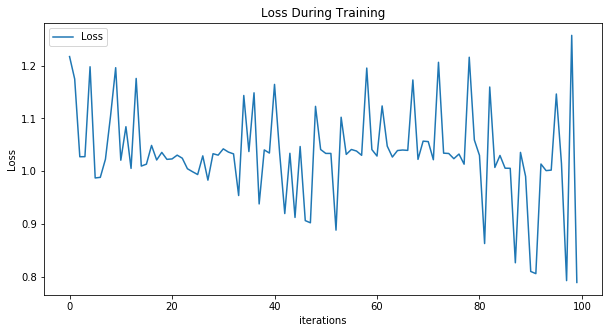

In [831]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Loss During Training")
plt.plot(log_loss[:100],label="Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

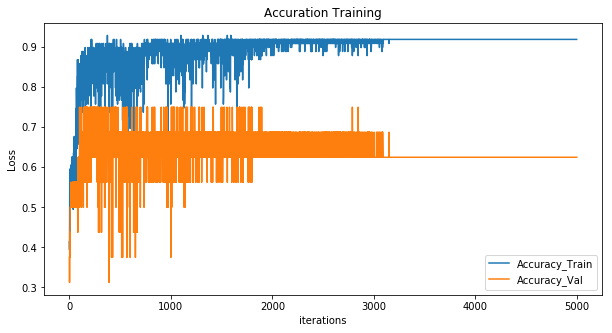

In [809]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Accuration Training")
plt.plot(Accuration_train,label="Accuracy_Train")
plt.plot(Accuration_val,label="Accuracy_Val")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [749]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)
loss = F.cross_entropy(input, target)
loss.backward()

In [751]:
input

tensor([[-0.4093, -0.9261, -0.7147, -0.2158, -0.2537],
        [-0.6887, -0.2478,  0.7922, -1.3068, -0.1814],
        [ 0.6934,  0.0136, -0.7860,  0.7531, -0.1215]], requires_grad=True)

In [752]:
target

tensor([2, 1, 2])

In [735]:
y_val

array([1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2], dtype=int64)

In [810]:
# Evaluate the model
test_var = Variable(torch.FloatTensor(x_val), requires_grad=True)
with torch.no_grad():
    result = net(test_var)
values, labels = torch.max(result, 1)
num_right = np.sum(labels.data.numpy() == y_val)
print('Accuracy {:.2f}'.format(num_right / len(y_val)))

Accuracy 0.62


c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [742]:
y_var

tensor([2])

In [737]:
labels

tensor([2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2])

In [487]:
values

tensor([0.0000, 0.0000, 0.0000, 1.6044, 0.0000, 0.0000, 0.0000, 0.0000, 3.2543,
        0.5282, 0.0000, 0.5796, 0.0000, 0.0000, 0.0000, 0.0000])

In [803]:
# Evaluate the model pada data train
test_var = Variable(torch.FloatTensor(x_train), requires_grad=True)
with torch.no_grad():
    result = net(test_var)
values, labels = torch.max(result, 1)
num_right = np.sum(labels.data.numpy() == y_train)
print('Accuracy {:.2f}'.format(num_right / len(y_train)))

Accuracy 0.90


c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
